# Predictive Analytics for Building Disaster Risk Management System: A Machine Learning Approach

# Necessary Environment

In [26]:
"""
#Necessary Environments: need to install once. Take out the comment signs to access them. 
Please put one code at a time.
pip install numpy
pip install pandas
pip install scikit-learn 
pip install matplotlib
pip install seaborn
pip install tensorflow
pip install plotly
pip install spacy
"""

'\n#Necessary Environments: need to install once. Take out the comment signs to access them. \nPlease put one code at a time.\npip install numpy\npip install pandas\npip install scikit-learn \npip install matplotlib\npip install seaborn\npip install tensorflow\npip install plotly\npip install spacy\n'

# Necessary Libraries

In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

# Loading Dataset

In [28]:
# Load the dataset
data = pd.read_excel('public_emdat_custom_request_2023-10-04_d6cfb020-1677-43f8-9e38-836dc810308f.xlsx')
# Check for NaN values in the DataFrame
missing_values = data.isnull().sum()
print("Number of missing values:\n", missing_values)
num_of_columns = len(data.columns)
print("Number of columns: ", num_of_columns)
num_of_rows = len(data.index)
print("Number of rows: ", num_of_rows)

Number of missing values:
 DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13622
Event Name                                   12020
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                      1574
Origin                                       11797
Associated Types                             12349
OFDA Response                                    0
Appeal                                           0
Declaration                                      0
AID 

# Disaster Subgroups Analysis

In [29]:
print(data['Disaster Subgroup'].unique())
#as biological disaster is not a natural disaster caused by climate etc., we are dropping this from dataset
#also 'Extra-terrestrial' has only one item, so this is also dropped
# Define the specific value to drop
value_to_drop = ['Biological' , 'Extra-terrestrial' ]

# Drop rows with the specific value in Disaster Subgroup
data = data[~data['Disaster Subgroup'].isin(value_to_drop)]
print(data['Disaster Subgroup'].unique())

['Hydrological' 'Climatological' 'Geophysical' 'Meteorological'
 'Biological' 'Extra-terrestrial']
['Hydrological' 'Climatological' 'Geophysical' 'Meteorological']


In [30]:
# Group the data by 'Disaster Subgroup' and create a dictionary of DataFrames
subgroup_datasets = dict(tuple(data.groupby('Disaster Subgroup')))

# Accessing individual subgroups: 'Hydrological','Climatological','Geophysical','Meteorological','Extra-terrestrial'
hydrological_df = subgroup_datasets.get('Hydrological')
num_of_rows = len(hydrological_df.index)
print("Number of rows hydrological_df: ", num_of_rows)

Climatological_df = subgroup_datasets.get('Climatological')
num_of_rows = len(Climatological_df.index)
print("Number of rows Climatological_df: ", num_of_rows)

Geophysical_df = subgroup_datasets.get('Geophysical')
#Geophysical_df.head(3)
num_of_rows = len(Geophysical_df.index)
print("Number of rows Geophysical_df: ", num_of_rows)

Meteorological_df = subgroup_datasets.get('Meteorological')
#Meteorological_df.head(3)
num_of_rows = len(Meteorological_df.index)
print("Number of rows Meteorological_df: ", num_of_rows)

#hydrological_df.head(3)
#data = hydrological_df
#data.dtypes

Number of rows hydrological_df:  6522
Number of rows Climatological_df:  1231
Number of rows Geophysical_df:  1565
Number of rows Meteorological_df:  5023


# Exploratory Data Analysis

<Figure size 1200x800 with 0 Axes>

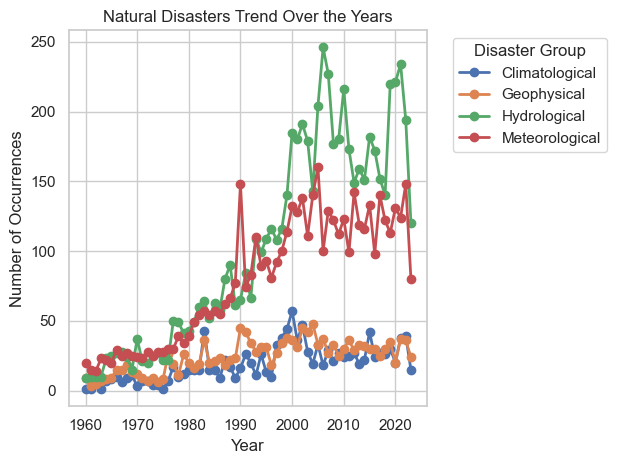

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional: for better style

# Set the style of seaborn for better aesthetics (optional)
sns.set(style="whitegrid")

# Group the data by 'Year' and 'Disaster Type' and calculate the count of occurrences
disaster_counts = data.groupby(['Start Year', 'Disaster Subgroup']).size().unstack()

# Plotting
plt.figure(figsize=(12, 8))
disaster_counts.plot(kind='line', marker='o', linewidth=2)

# Adding labels and title
plt.title('Natural Disasters Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Disaster Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


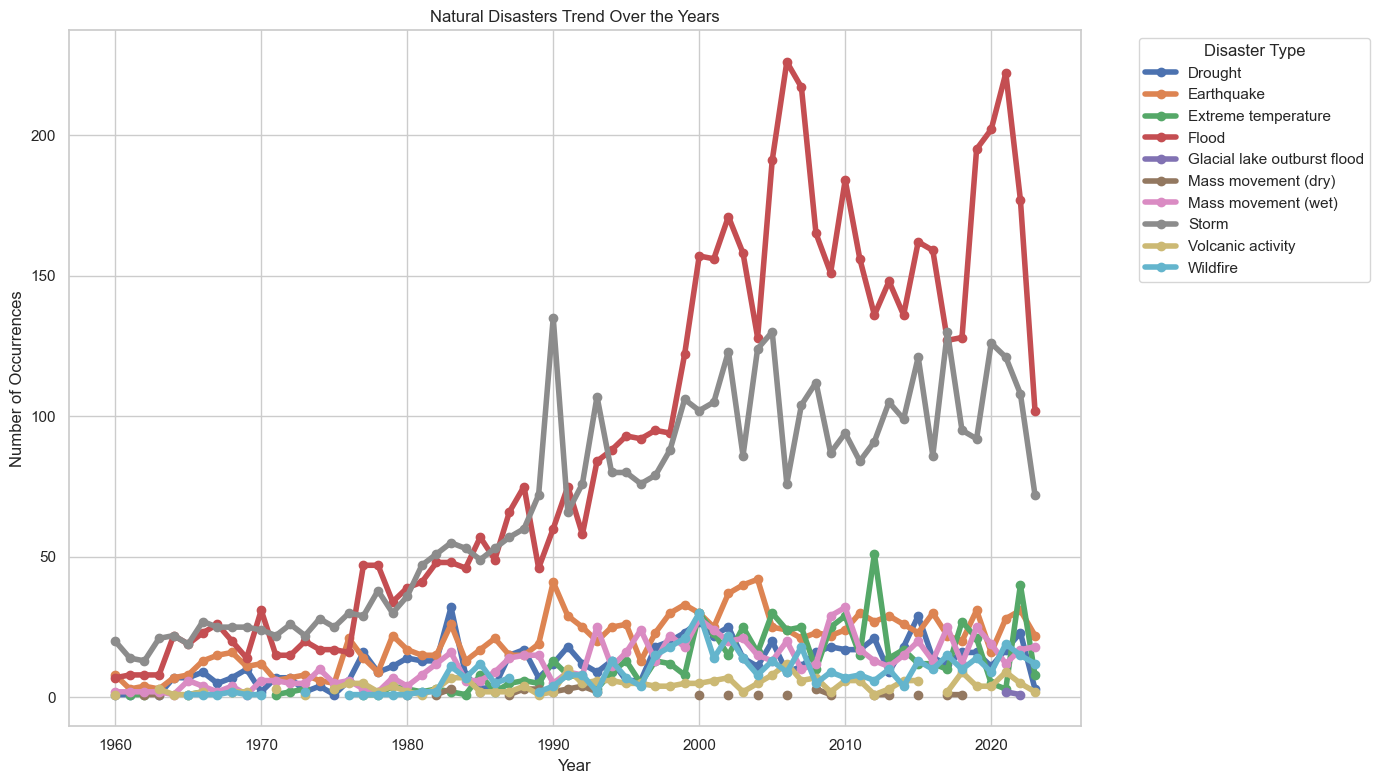

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics (optional)
sns.set(style="whitegrid")

# Group the data by 'Start Year' and 'Disaster Type' and calculate the count of occurrences
disaster_counts = data.groupby(['Start Year', 'Disaster Type']).size().unstack()

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting on the single subplot
disaster_counts.plot(kind='line', marker='o', linewidth=4, ax=ax)

# Adding labels and title to the plot
ax.set_title('Natural Disasters Trend Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Occurrences')
ax.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [33]:
import plotly.express as px

# Group the data by 'Year' and 'Disaster Type' and calculate the count of occurrences
disaster_counts = data.groupby(['Start Year', 'Disaster Type']).size().unstack().reset_index()

# Melt the DataFrame to long format for plotting
melted_data = disaster_counts.melt(id_vars='Start Year', var_name='Disaster Type', value_name='Number of Occurrences')

# Create an interactive bar plot using Plotly Express
fig = px.bar(
    melted_data,
    x='Start Year',
    y='Number of Occurrences',
    color='Disaster Type',
    title='Natural Disasters Trend Over the Years',
    labels={'Number of Occurrences': 'Number of Occurrences'},
    width=1200,  # Adjust the width as needed
    height=600,  # Adjust the height as needed
)

# Show the plot
fig.show()


# Data preprocessing and Feature Engineering

## Data Cleaning

In [34]:
# Dropping columns
data = data.drop(columns = ['DisNo.', 'Historic', 'Classification Key', 'Disaster Group','External IDs', 'Event Name', 
'ISO', 'Subregion','Location', 'Latitude', 'Longitude', 'River Basin', 'Start Month', 'Start Day', 'End Month', 
'End Day', 'No. Injured', 'No. Affected', 'No. Homeless', "Reconstruction Costs ('000 US$)",
"Reconstruction Costs, Adjusted ('000 US$)","Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)",
"Total Damage, Adjusted ('000 US$)",'Admin Units', 'Entry Date', 'Associated Types', 'OFDA Response', 'Appeal',
       'Declaration', "AID Contribution ('000 US$)",'Last Update', 'Origin'])

num_of_rows = len(data.index)
print("Number of rows: ", num_of_rows)

num_of_columns = len(data.columns)
print("Number of columns: ", num_of_columns)
#data.head()
#print(data.dtypes)
print(data.columns)
data.dtypes

missing_values = data.isnull().sum()
print("Number of missing values:\n", missing_values)
data.dtypes

Number of rows:  14341
Number of columns:  13
Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Country',
       'Region', 'Magnitude', 'Magnitude Scale', 'Start Year', 'End Year',
       'Total Deaths', 'Total Affected', 'Total Damage ('000 US$)', 'CPI'],
      dtype='object')
Number of missing values:
 Disaster Subgroup             0
Disaster Type                 0
Disaster Subtype              0
Country                       0
Region                        0
Magnitude                  9522
Magnitude Scale            1062
Start Year                    0
End Year                      0
Total Deaths               4393
Total Affected             3629
Total Damage ('000 US$)    9065
CPI                         239
dtype: int64


Disaster Subgroup           object
Disaster Type               object
Disaster Subtype            object
Country                     object
Region                      object
Magnitude                  float64
Magnitude Scale             object
Start Year                   int64
End Year                     int64
Total Deaths               float64
Total Affected             float64
Total Damage ('000 US$)    float64
CPI                        float64
dtype: object

In [35]:
#Delete rows with NaN values in the specified column
data.dropna(subset=['Magnitude', 'Magnitude Scale', 'Total Deaths', 'Total Affected', 
                    "Total Damage ('000 US$)", 'CPI'], inplace=True)

# Check how many NaN values are in each column
nan_counts = data.isna().sum()

print(nan_counts)
num_of_rows = len(data.index)
print("Number of rows: ", num_of_rows)


Disaster Subgroup          0
Disaster Type              0
Disaster Subtype           0
Country                    0
Region                     0
Magnitude                  0
Magnitude Scale            0
Start Year                 0
End Year                   0
Total Deaths               0
Total Affected             0
Total Damage ('000 US$)    0
CPI                        0
dtype: int64
Number of rows:  1708


# Natural Language Processing (NLP)

In [36]:
#only running once is sufficient
#import spacy.cli
#spacy.cli.download("en_core_web_lg")

In [37]:
import spacy
#import en_core_web_sm
# Initialize spacy with the English language model
nlp = spacy.load('en_core_web_lg')
#nlp = en_core_web_sm.load()

# Define a function to perform lemmatization and standardize words
def standardize_origin(text):
    doc = nlp(text)
    standardized_tokens = [token.lemma_ for token in doc]
    return ' '.join(standardized_tokens)

# Apply the standardization function to the "Disaster Subtype" column
data['Disaster Subtype'] = data['Disaster Subtype'].apply(standardize_origin)
#data['Associated Types'] = data['Associated Types'].apply(standardize_origin)


# Display the modified DataFrame
print(data['Disaster Subtype'])
#print(data['Associated Types'])

10       ground movement
11       ground movement
12       ground movement
39       ground movement
42       ground movement
              ...       
15802    ground movement
15803    ground movement
15805    ground movement
15885     riverine flood
15895     riverine flood
Name: Disaster Subtype, Length: 1708, dtype: object


# Label Encoding for Categorical Values

In [38]:

# Initialize the label encoder
label_encoder = LabelEncoder()

# Iterate through the columns and apply label encoding to categorical columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column + '_encoded'] = label_encoder.fit_transform(data[column])

# The categorical columns have been replaced with corresponding '_encoded' columns containing numeric labels
#print(data)
print(data.columns)

num_of_rows = len(data.index)
print("Number of rows: ", num_of_rows)


Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Country',
       'Region', 'Magnitude', 'Magnitude Scale', 'Start Year', 'End Year',
       'Total Deaths', 'Total Affected', 'Total Damage ('000 US$)', 'CPI',
       'Disaster Subgroup_encoded', 'Disaster Type_encoded',
       'Disaster Subtype_encoded', 'Country_encoded', 'Region_encoded',
       'Magnitude Scale_encoded'],
      dtype='object')
Number of rows:  1708


In [39]:
#datatypes identifying
data.dtypes

Disaster Subgroup             object
Disaster Type                 object
Disaster Subtype              object
Country                       object
Region                        object
Magnitude                    float64
Magnitude Scale               object
Start Year                     int64
End Year                       int64
Total Deaths                 float64
Total Affected               float64
Total Damage ('000 US$)      float64
CPI                          float64
Disaster Subgroup_encoded      int64
Disaster Type_encoded          int64
Disaster Subtype_encoded       int64
Country_encoded                int64
Region_encoded                 int64
Magnitude Scale_encoded        int64
dtype: object

In [40]:
num_of_columns = len(data.columns)
num_of_rows = len(data.index)

print("Number of columns: ", num_of_columns)
print("Number of rows: ", num_of_rows)
print(data.columns)

Number of columns:  19
Number of rows:  1708
Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Country',
       'Region', 'Magnitude', 'Magnitude Scale', 'Start Year', 'End Year',
       'Total Deaths', 'Total Affected', 'Total Damage ('000 US$)', 'CPI',
       'Disaster Subgroup_encoded', 'Disaster Type_encoded',
       'Disaster Subtype_encoded', 'Country_encoded', 'Region_encoded',
       'Magnitude Scale_encoded'],
      dtype='object')


In [41]:
#checking missing values
missing_values = data.isnull().sum()

print("Number of missing values:\n", missing_values)


Number of missing values:
 Disaster Subgroup            0
Disaster Type                0
Disaster Subtype             0
Country                      0
Region                       0
Magnitude                    0
Magnitude Scale              0
Start Year                   0
End Year                     0
Total Deaths                 0
Total Affected               0
Total Damage ('000 US$)      0
CPI                          0
Disaster Subgroup_encoded    0
Disaster Type_encoded        0
Disaster Subtype_encoded     0
Country_encoded              0
Region_encoded               0
Magnitude Scale_encoded      0
dtype: int64


## Dropping Columns with Categorical Value

In [42]:
data.head(3)
data = data.drop(columns = ['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Country','Region', 'Magnitude Scale'
                           ])
num_of_columns = len(data.columns)
num_of_rows = len(data.index)

print("Number of columns: ", num_of_columns)
print("Number of rows: ", num_of_rows)
print(data.columns)

Number of columns:  13
Number of rows:  1708
Index(['Magnitude', 'Start Year', 'End Year', 'Total Deaths', 'Total Affected',
       'Total Damage ('000 US$)', 'CPI', 'Disaster Subgroup_encoded',
       'Disaster Type_encoded', 'Disaster Subtype_encoded', 'Country_encoded',
       'Region_encoded', 'Magnitude Scale_encoded'],
      dtype='object')


# Outlier Detection and Removal

/var/folders/d_/8rfkyyz52zx2q2zj0g_7xvk40000gn/T/ipykernel_56859/577211450.py:14: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



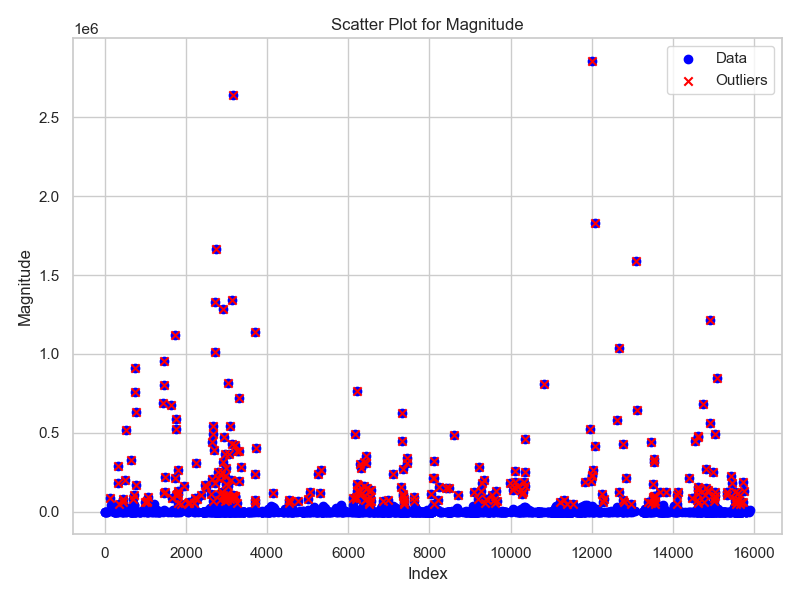

/var/folders/d_/8rfkyyz52zx2q2zj0g_7xvk40000gn/T/ipykernel_56859/577211450.py:14: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



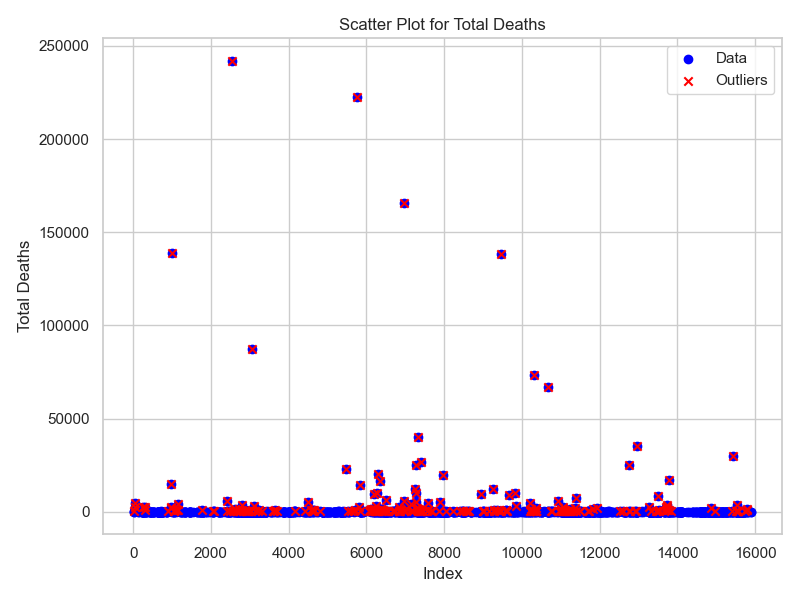

/var/folders/d_/8rfkyyz52zx2q2zj0g_7xvk40000gn/T/ipykernel_56859/577211450.py:14: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



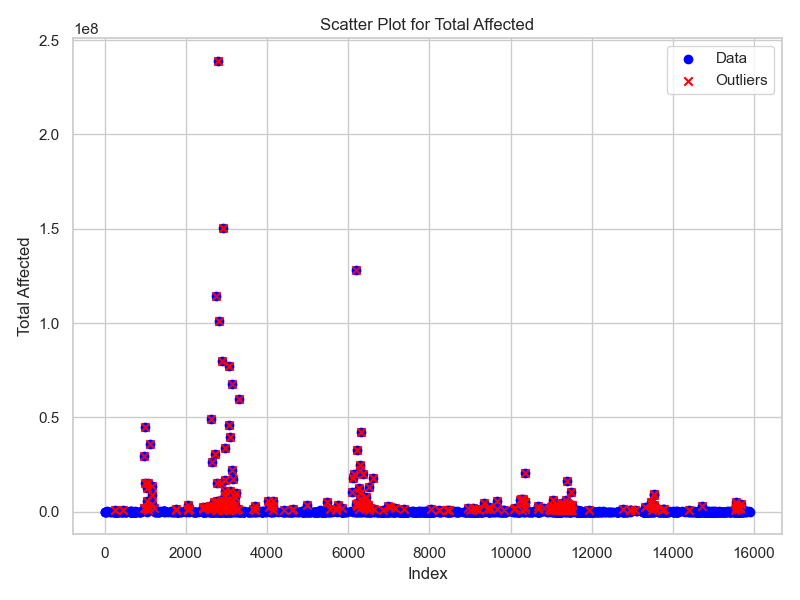

/var/folders/d_/8rfkyyz52zx2q2zj0g_7xvk40000gn/T/ipykernel_56859/577211450.py:14: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



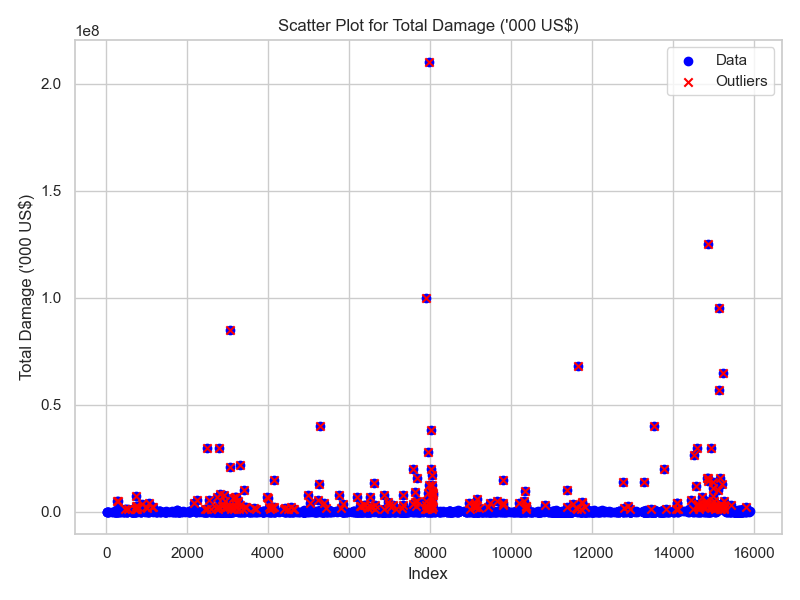

/var/folders/d_/8rfkyyz52zx2q2zj0g_7xvk40000gn/T/ipykernel_56859/577211450.py:14: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



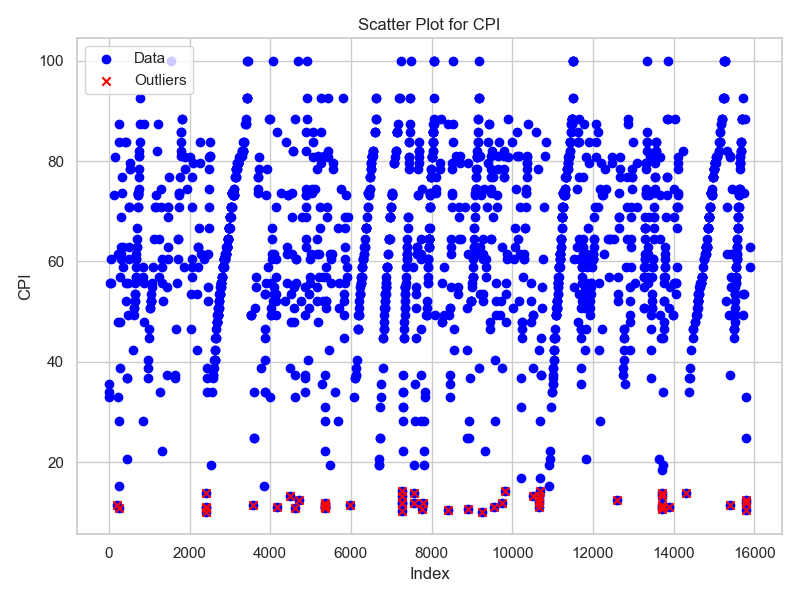

Columns with outliers: ['Magnitude', 'Total Deaths', 'Total Affected', "Total Damage ('000 US$)", 'CPI']


/var/folders/d_/8rfkyyz52zx2q2zj0g_7xvk40000gn/T/ipykernel_56859/577211450.py:14: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



In [43]:

# Define a threshold to identify outliers
threshold = 1.5

# Initialize a list to store the columns with outliers
columns_with_outliers = []

# Create a directory to store scatter plots
if not os.path.exists('scatter_plots'):
    os.makedirs('scatter_plots')

# Loop through all columns
for column_name in data.columns:
    # Skip non-numeric columns
    if data[column_name].dtype != np.number:
        continue

    # Calculate the IQR (Interquartile Range)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers in the current column
    column_outliers = data[(data[column_name] < Q1 - threshold * IQR) | (data[column_name] > Q3 + threshold * IQR)]

    # Check if there are outliers
    if not column_outliers.empty:
        columns_with_outliers.append(column_name)

        # Create a scatter plot highlighting outliers
        plt.figure(figsize=(8, 6))
        plt.title(f'Scatter Plot for {column_name}')
        plt.scatter(data.index, data[column_name], c='blue', label='Data')
        plt.scatter(column_outliers.index, column_outliers[column_name], c='red', label='Outliers', marker='x')
        plt.xlabel('Index')
        plt.ylabel(column_name)
        plt.legend()
        plt.tight_layout()

        # Save the scatter plot as an image
        plot_filename = f'scatter_plots/{column_name}_scatter_plot.png'
        plt.savefig(plot_filename)

        # Display the scatter plot within the notebook
        display(Image(filename=plot_filename))

        plt.close()

# Print the columns with outliers
if columns_with_outliers:
    print("Columns with outliers:", columns_with_outliers)
else:
    print("No columns with outliers")


In [44]:
# Define a threshold to identify outliers
threshold = 1.5
# Remove outliers from all columns
for column_name in columns_with_outliers:
    # Calculate the IQR (Interquartile Range)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Replace outliers with NaN
    data[column_name] = np.where((data[column_name] < lower_bound) | (data[column_name] > upper_bound), np.nan, data[column_name])

# Store the cleaned data in a new DataFrame
data = data.dropna()

num_of_columns = len(data.columns)
num_of_rows = len(data.index)

print("Number of columns: ", num_of_columns)
print("Number of rows: ", num_of_rows)
print(data.columns)

Number of columns:  13
Number of rows:  946
Index(['Magnitude', 'Start Year', 'End Year', 'Total Deaths', 'Total Affected',
       'Total Damage ('000 US$)', 'CPI', 'Disaster Subgroup_encoded',
       'Disaster Type_encoded', 'Disaster Subtype_encoded', 'Country_encoded',
       'Region_encoded', 'Magnitude Scale_encoded'],
      dtype='object')


# Modelling Approach

## Linear Regression Model as a Baseline Model

In [45]:

#Linear Regression without clustering for total deaths

# Assuming your dataset is named 'data'
# Features
X = data.drop(columns=["Total Deaths"])

# Target variable
y = data["Total Deaths"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print("Linear Regression Model:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Linear Regression Model:
Mean Squared Error: 1133.8613612909965
R-squared: 0.07747507051888147


In [46]:
#Linear Regression without clustering for total Damage ('000 US$)

# Assuming your dataset is named 'data'
# Features
X = data.drop(columns=["Total Damage ('000 US$)"])

# Target variable
y = data["Total Damage ('000 US$)"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print("Linear Regression Model:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Linear Regression Model:
Mean Squared Error: 44978634351.21355
R-squared: 0.06989121740998983


# Standardization and K Means Clustering

In [47]:

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Clustering
# You can use K-Means clustering to create clusters based on the data.
n_clusters = 10  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Split the data into clusters
clustered_data = []
for cluster_id in range(n_clusters):
    cluster = data[data['Cluster'] == cluster_id]
    clustered_data.append(cluster)



/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Build Predictive Models for Total Deaths Prediction

Mean Squared Error: 885.7335306553911
R-squared: 0.3481399549757195

RandomForestRegressor:
Mean Squared Error: 316.96922843551795
R-squared: 0.7667249027296034


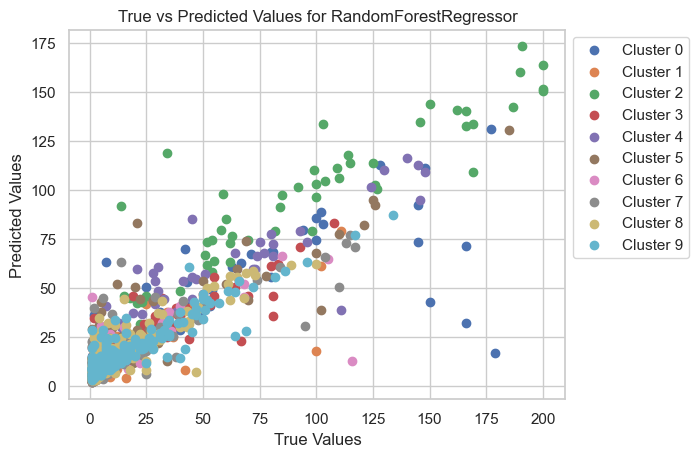

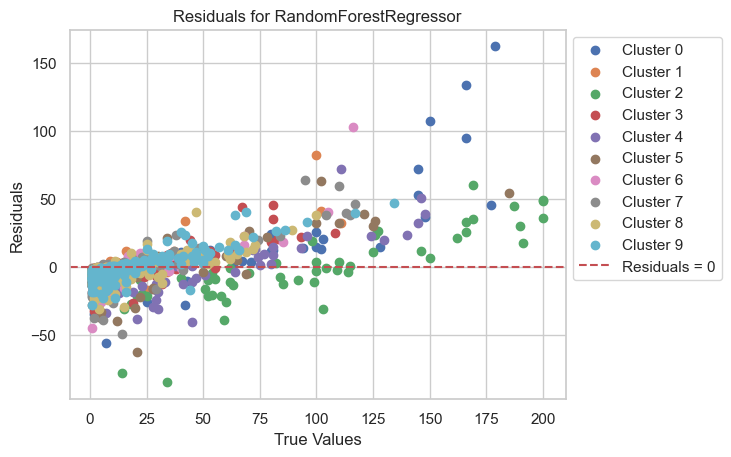


LinearRegression:
Mean Squared Error: 916512.1424571212
R-squared: -673.5117191231656


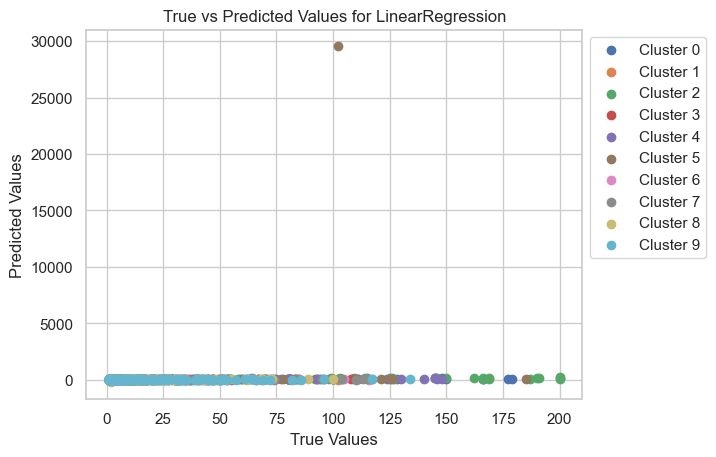

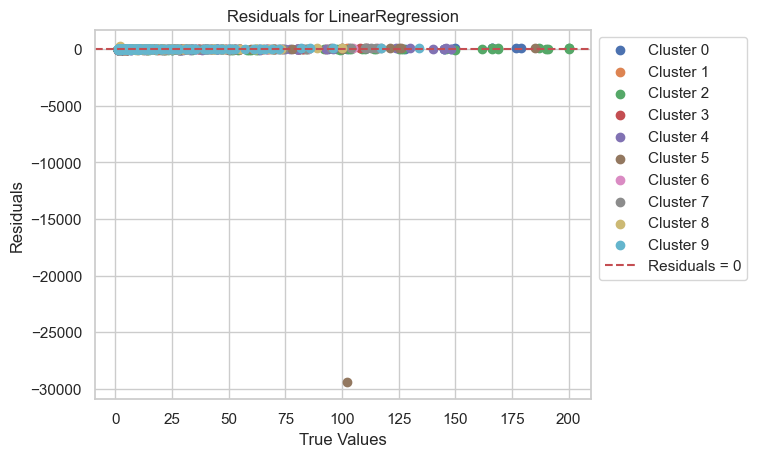


DecisionTreeRegressor:
Mean Squared Error: 337.669133192389
R-squared: 0.7514907037523693


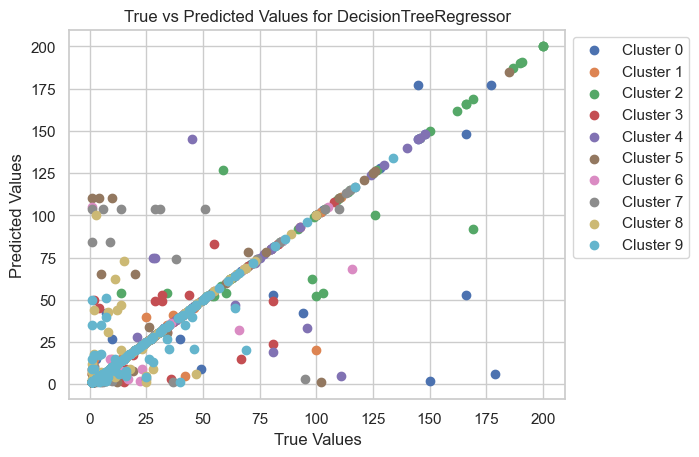

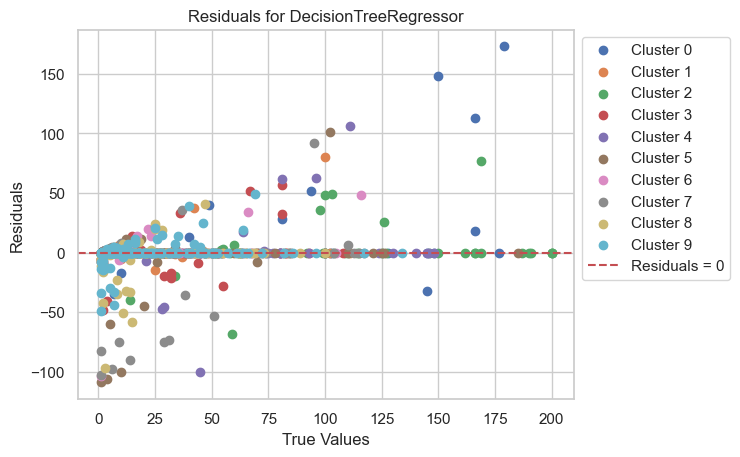


SVR:
Mean Squared Error: 1102.942284556698
R-squared: 0.18828408049730172


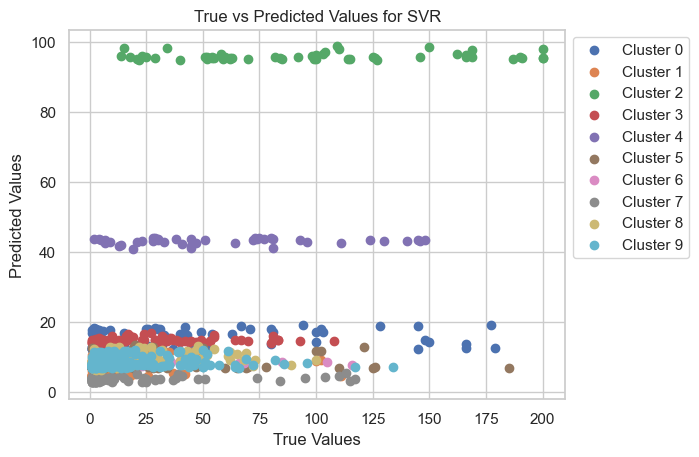

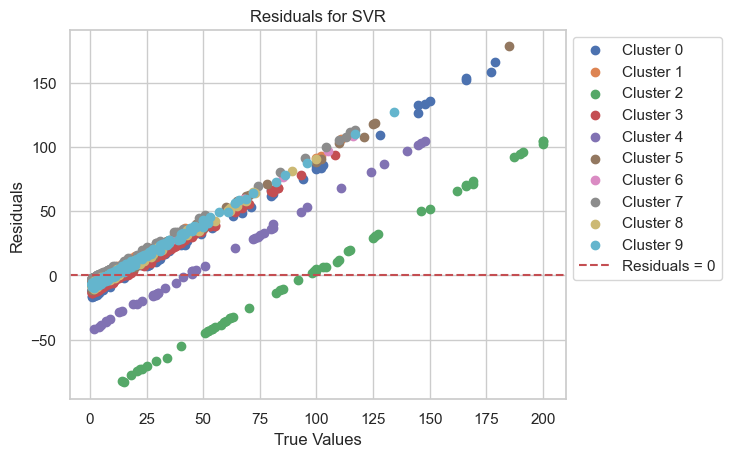


MLPRegressor:
Mean Squared Error: 1477152.7927830734
R-squared: -1086.1180244230209


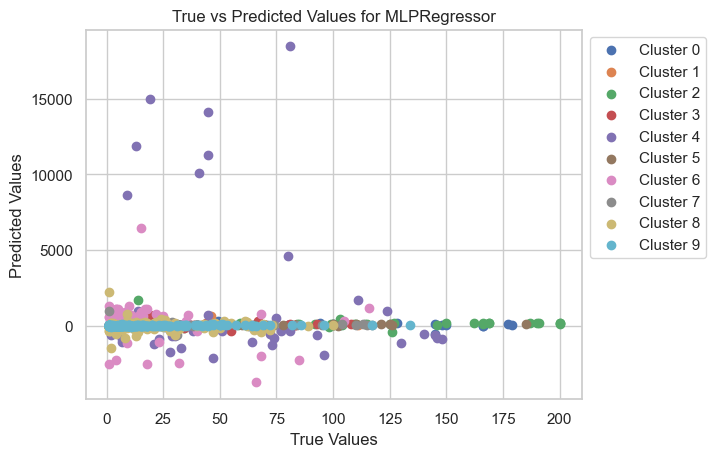

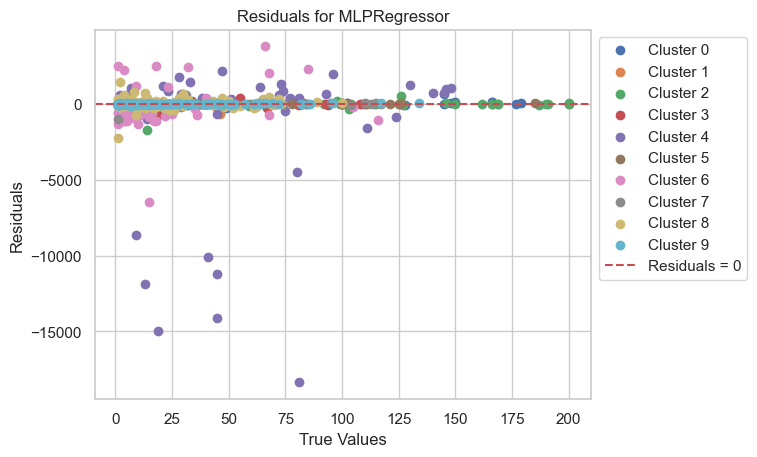


KNeighborsRegressor:
Mean Squared Error: 885.7335306553911
R-squared: 0.3481399549757195


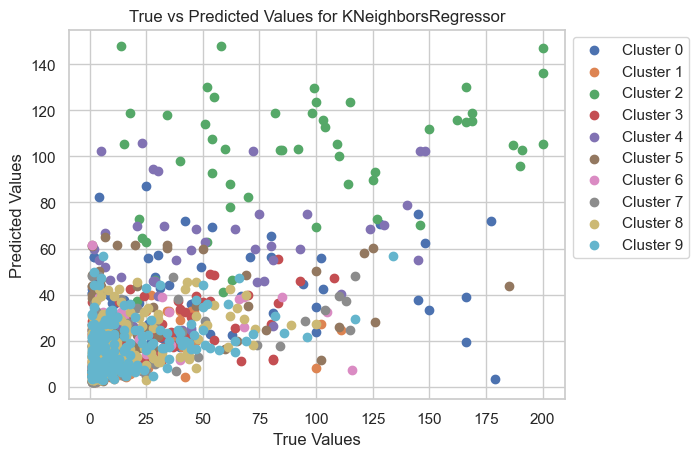

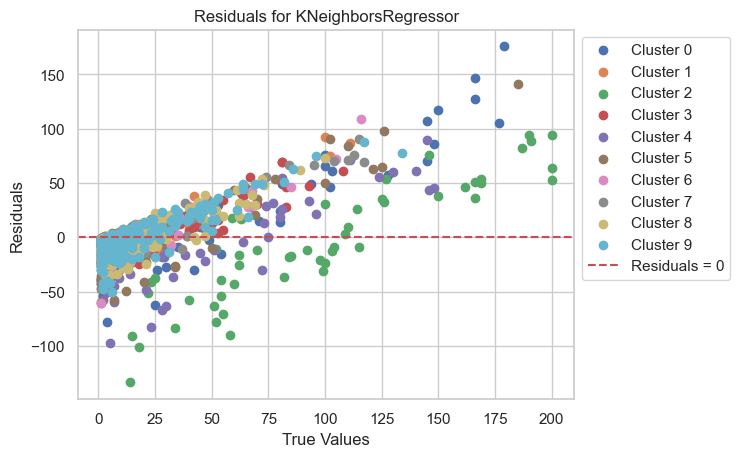

In [48]:


# Build Predictive Models for Each Cluster
models = []
for cluster_id, cluster in enumerate(clustered_data):
    X = cluster.drop(columns=['Total Deaths'])  # Features
    y = cluster['Total Deaths']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a predictive model (e.g., Random Forest)
    random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    models.append((random_forest_model, cluster_id, 'RandomForestRegressor'))

    # Train Linear Regression model
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)
    models.append((linear_regression_model, cluster_id, 'LinearRegression'))
    
    # Train Decision Tree model
    decision_tree_model = DecisionTreeRegressor(random_state=42)
    decision_tree_model.fit(X_train, y_train)
    models.append((decision_tree_model, cluster_id, 'DecisionTreeRegressor'))

    # Train SVM model
    svm_model = SVR()
    svm_model.fit(X_train, y_train)
    models.append((svm_model, cluster_id, 'SVR'))

    # Train MLP model
    mlp_model = MLPRegressor(max_iter=6200, random_state=42)
    mlp_model.fit(X_train, y_train)
    models.append((mlp_model, cluster_id, 'MLPRegressor'))

    # Train KNN model
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train, y_train)
    models.append((knn_model, cluster_id, 'KNeighborsRegressor'))


# Make Predictions
all_predictions = {model_name: [] for _, _, model_name in models}
for model, cluster_id, model_name in models:
    cluster = data[data['Cluster'] == cluster_id]
    X = cluster.drop(columns=['Total Deaths'])
    predictions = model.predict(X)
    all_predictions[model_name].append(predictions)

# Combine Predictions
combined_predictions = np.zeros(len(data))
for model_name, predictions_list in all_predictions.items():
    for i, predictions in enumerate(predictions_list):
        cluster_indices = data['Cluster'] == i
        combined_predictions[cluster_indices] = predictions


# Evaluate the Overall Model
y_true = data['Total Deaths']
mse = mean_squared_error(y_true, combined_predictions)
r2 = r2_score(y_true, combined_predictions)

# Print Evaluation Metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print Evaluation Metrics for each model
for model_name, predictions_list in all_predictions.items():
    model_combined_predictions = np.zeros(len(data))
    for i, predictions in enumerate(predictions_list):
        cluster_indices = data['Cluster'] == i
        model_combined_predictions[cluster_indices] = predictions

    model_mse = mean_squared_error(y_true, model_combined_predictions)
    model_r2 = r2_score(y_true, model_combined_predictions)

    print(f"\n{model_name}:")
    print(f"Mean Squared Error: {model_mse}")
    print(f"R-squared: {model_r2}")

    # Scatter plot
    fig, ax = plt.subplots()
    for i, predictions in enumerate(predictions_list):
        cluster_indices = data['Cluster'] == i
        true_values = y_true[cluster_indices]

        ax.scatter(true_values, predictions, label=f'Cluster {i}')

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'True vs Predicted Values for {model_name}')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # Residual plot
    fig, ax = plt.subplots()
    for i, predictions in enumerate(predictions_list):
        cluster_indices = data['Cluster'] == i
        true_values = y_true[cluster_indices]
        residuals = true_values - predictions

        ax.scatter(true_values, residuals, label=f'Cluster {i}')

    ax.axhline(y=0, color='r', linestyle='--', label='Residuals = 0')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Residuals for {model_name}')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


# Build Predictive Models for Total Damage ('000 USD) Prediction

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (6200) reached and the optimization hasn't converged yet.

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (6200) reached and the optimization hasn't converged yet.

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (6200) reached and the optimization hasn't converged yet.

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (6200) reached and the optimization hasn't converged yet.

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site

Mean Squared Error: 24195240192.825752
R-squared: 0.5698945235192456

RandomForestRegressor:
Mean Squared Error: 10799939124.036936
R-squared: 0.8080154226249677


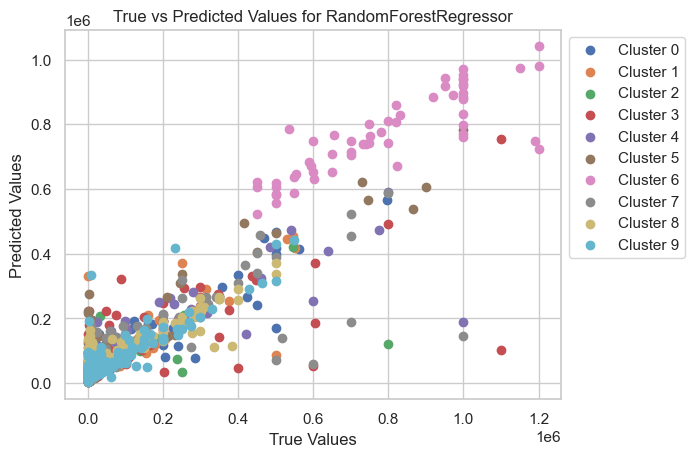

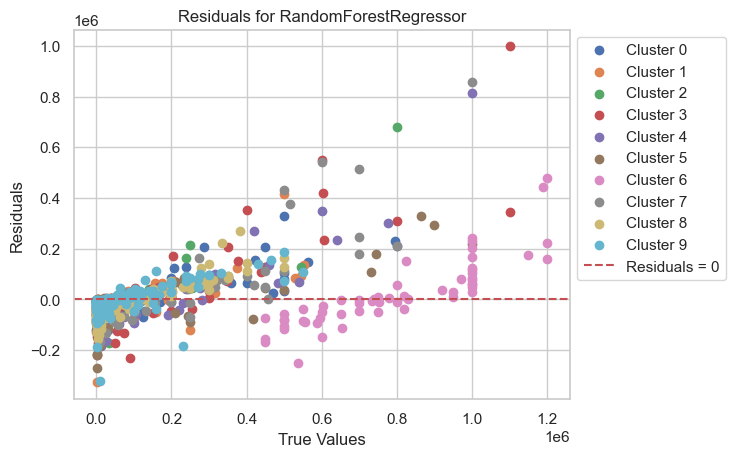


LinearRegression:
Mean Squared Error: 38264541077.809975
R-squared: 0.31979230041002715


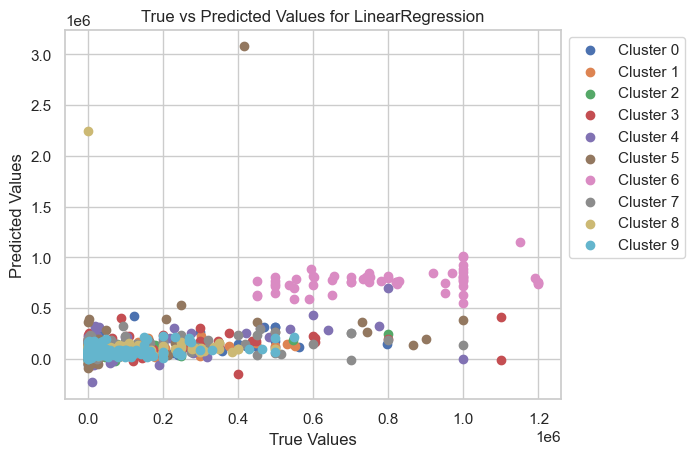

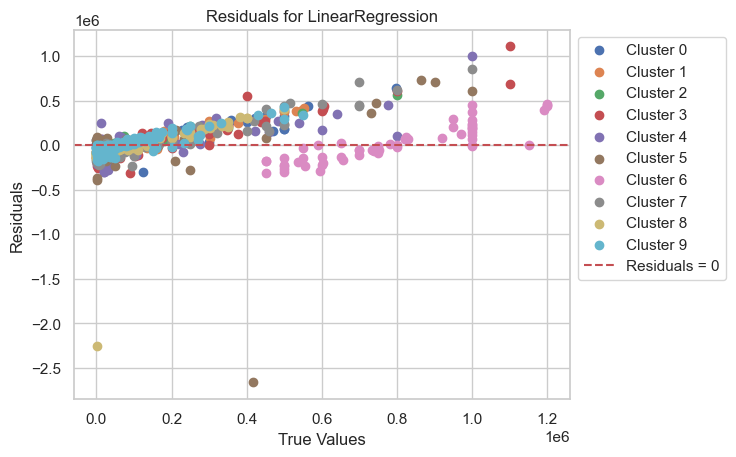


DecisionTreeRegressor:
Mean Squared Error: 10433820850.348837
R-squared: 0.8145237057954577


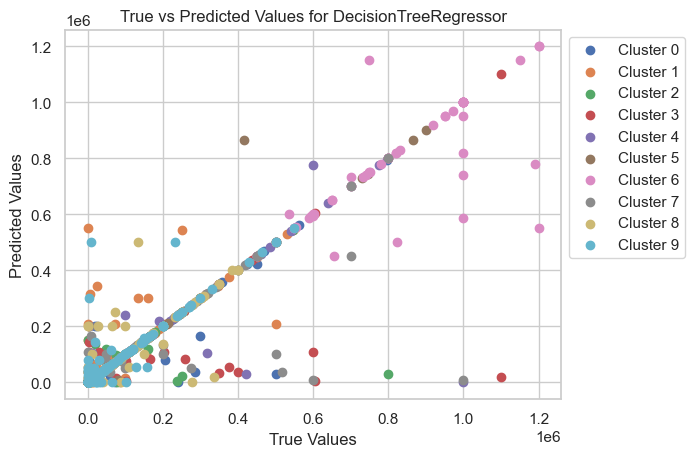

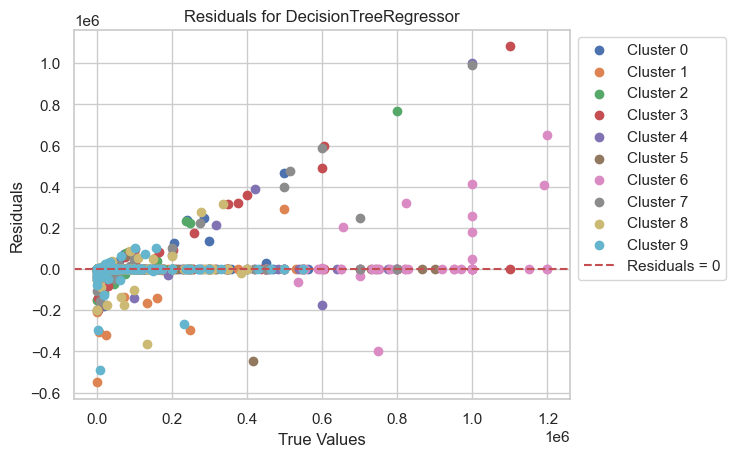


SVR:
Mean Squared Error: 33500761626.356106
R-squared: 0.4044753874340745


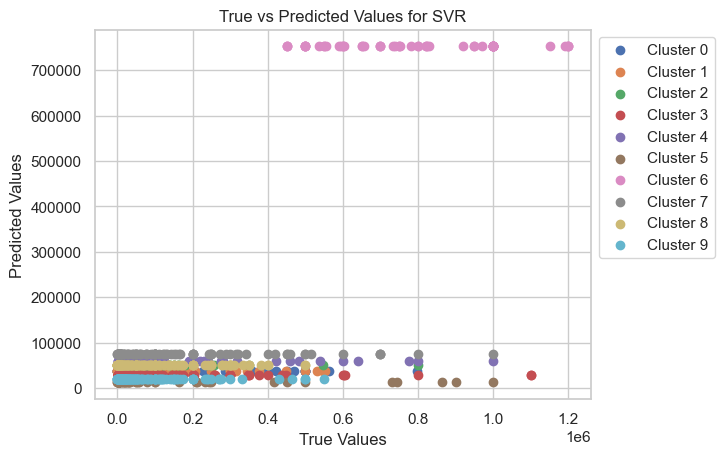

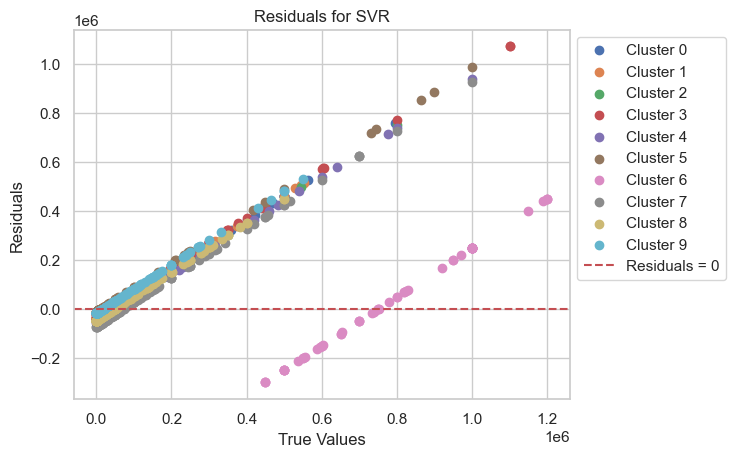


MLPRegressor:
Mean Squared Error: 27775556606.127922
R-squared: 0.5062492079686357


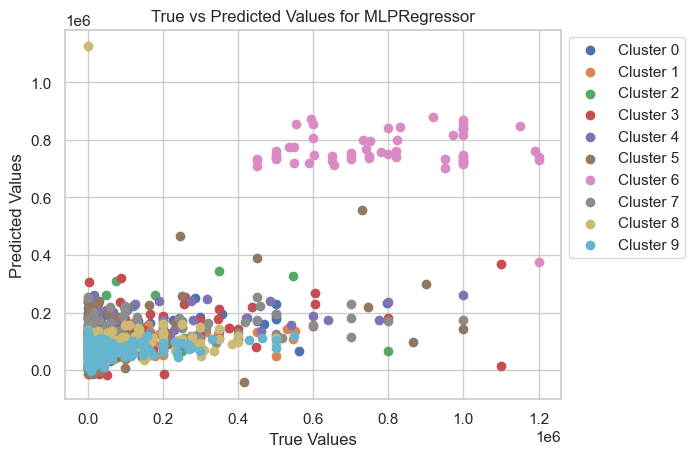

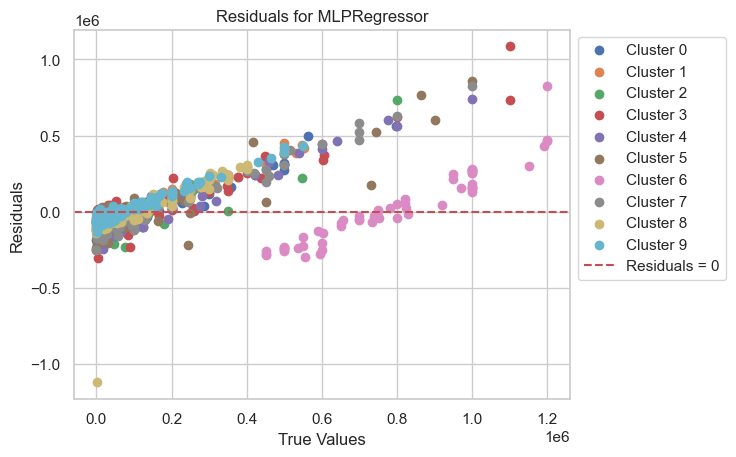


KNeighborsRegressor:
Mean Squared Error: 24195240192.825752
R-squared: 0.5698945235192456


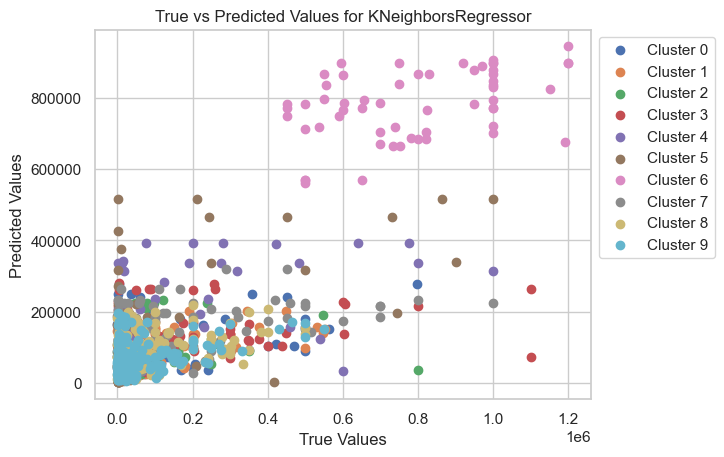

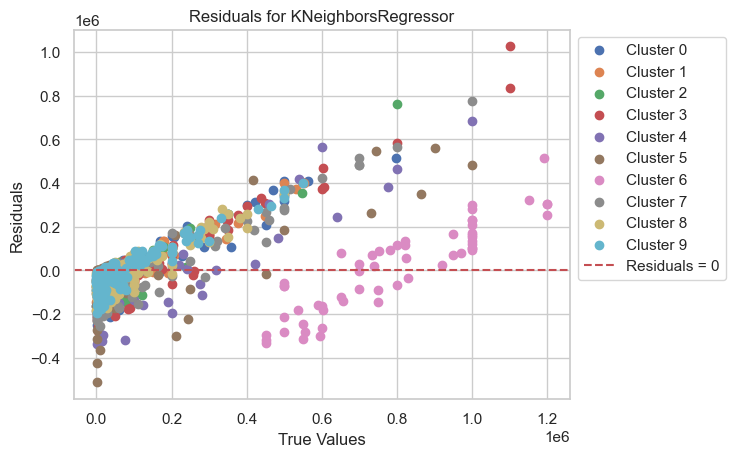

In [49]:

# Build Predictive Models for Each Cluster
models = []
for cluster_id, cluster in enumerate(clustered_data):
    X = cluster.drop(columns=["Total Damage ('000 US$)"])  # Features
    y = cluster["Total Damage ('000 US$)"]  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a predictive model (e.g., Random Forest)
    random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    models.append((random_forest_model, cluster_id, 'RandomForestRegressor'))

    # Train Linear Regression model
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)
    models.append((linear_regression_model, cluster_id, 'LinearRegression'))
    
    # Train Decision Tree model
    decision_tree_model = DecisionTreeRegressor(random_state=42)
    decision_tree_model.fit(X_train, y_train)
    models.append((decision_tree_model, cluster_id, 'DecisionTreeRegressor'))

    # Train SVM model
    svm_model = SVR()
    svm_model.fit(X_train, y_train)
    models.append((svm_model, cluster_id, 'SVR'))

    # Train MLP model
    mlp_model = MLPRegressor(max_iter=6200, random_state=42)
    mlp_model.fit(X_train, y_train)
    models.append((mlp_model, cluster_id, 'MLPRegressor'))

    # Train KNN model
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train, y_train)
    models.append((knn_model, cluster_id, 'KNeighborsRegressor'))


# Make Predictions
all_predictions = {model_name: [] for _, _, model_name in models}
for model, cluster_id, model_name in models:
    cluster = data[data['Cluster'] == cluster_id]
    X = cluster.drop(columns=["Total Damage ('000 US$)"])
    predictions = model.predict(X)
    all_predictions[model_name].append(predictions)

# Combine Predictions
combined_predictions = np.zeros(len(data))
for model_name, predictions_list in all_predictions.items():
    for i, predictions in enumerate(predictions_list):
        cluster_indices = data['Cluster'] == i
        combined_predictions[cluster_indices] = predictions


# Evaluate the Overall Model
y_true = data["Total Damage ('000 US$)"]
mse = mean_squared_error(y_true, combined_predictions)
r2 = r2_score(y_true, combined_predictions)

# Print Evaluation Metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print Evaluation Metrics for each model
for model_name, predictions_list in all_predictions.items():
    model_combined_predictions = np.zeros(len(data))
    for i, predictions in enumerate(predictions_list):
        cluster_indices = data['Cluster'] == i
        model_combined_predictions[cluster_indices] = predictions

    model_mse = mean_squared_error(y_true, model_combined_predictions)
    model_r2 = r2_score(y_true, model_combined_predictions)

    print(f"\n{model_name}:")
    print(f"Mean Squared Error: {model_mse}")
    print(f"R-squared: {model_r2}")

    # Scatter plot
    fig, ax = plt.subplots()
    for i, predictions in enumerate(predictions_list):
        cluster_indices = data['Cluster'] == i
        true_values = y_true[cluster_indices]

        ax.scatter(true_values, predictions, label=f'Cluster {i}')

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'True vs Predicted Values for {model_name}')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # Residual plot
    fig, ax = plt.subplots()
    for i, predictions in enumerate(predictions_list):
        cluster_indices = data['Cluster'] == i
        true_values = y_true[cluster_indices]
        residuals = true_values - predictions

        ax.scatter(true_values, residuals, label=f'Cluster {i}')

    ax.axhline(y=0, color='r', linestyle='--', label='Residuals = 0')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Residuals for {model_name}')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
